# Magnetic and Diagenetic Analyses of Ishikawa (2002)
_____

Paper doi: https://link.springer.com/content/pdf/10.1186/BF03352436.pdf, https://doi.org/10.2973/odp.proc.sr.180.162.2002

Core: ODP Leg 180 Site 1118 (9º35.110'S, 151º34.421'E)

Water depth: 2304 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magn = pd.read_excel("data/ishikawa2002/1118.xlsx", sheet_name="1118 Ms")
geochem = pd.read_excel("data/ishikawa2002/1118.xlsx", sheet_name="geochem")
toc = pd.read_excel("data/ishikawa2002/1118.xlsx", sheet_name="TOC")
ages = pd.read_excel("data/ishikawa2002/1118.xlsx", sheet_name="ages")

# only unit adjustment is magnetite
magn["Magnetite [ppm]"] = (magn["Ms (Am^2/kg)"] * 10**6) / 92
magn["Magnetite [wt. %]"] = (magn["Ms (Am^2/kg)"] * 10**2) / 92

/Users/jackkreisler/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# calculate sed rates
sed_rates = data_fns.sed_rates(ages["Age (Ma)"], ages["Depth (mbsf)"])

In [4]:
# combine stuff together
magn_df = pd.DataFrame({"Depth [mbsf]":magn["Depth (mbsf)"], "Magnetite [ppm]":magn["Magnetite [ppm]"], "Magnetite [wt. %]":magn["Magnetite [wt. %]"]})
geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["Depth (mbsf)"], "Sulfate [mM]":geochem["Sulfate(SO4) (mM)"]})
toc_df = pd.DataFrame({"Depth [mbsf]":toc["Depth (mbsf)"], "TOC [wt. %]":toc["ORG_C (wt %)"]})
seds_df = pd.DataFrame({"Depth [mbsf]":ages["Depth (mbsf)"], "Sedimentation Rate [m/Ma]":sed_rates})

comb_df = pd.concat([magn_df, geochem_df, toc_df, seds_df]).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [5]:
# interpolate
# sed rates go all the way down to the lowest Ms depth, so no worries there
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "TOC [wt. %]"])


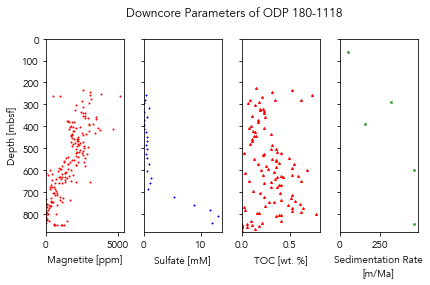

In [8]:
# downcore plots
colors = ["r", "b", "r", "g"]
markers = [".", "+", "^", "x"]
comp_markers = [".", ".", ".", "."]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Ma]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of ODP 180-1118", x=0.55)
# dc_axs[0].set_xlim(right=50)
# dc_axs[2].set_xlim((-0.15,2))
dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Ma]")
#dc_axs[0].set_xticks([0, 0.25, 0.5])
dc_fig.tight_layout()
dc_fig.savefig("outputs/ishikawa2002/1118/dc1.pdf")

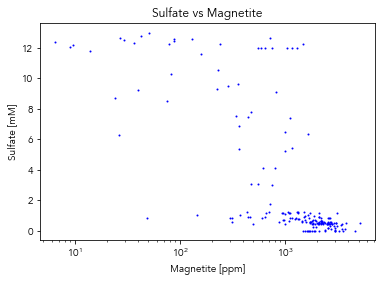

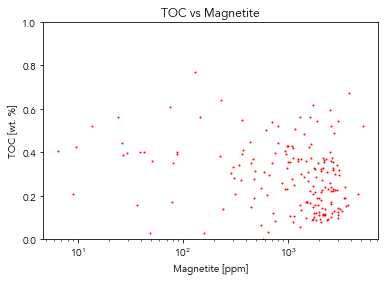

In [9]:
# comparison plots (exclude 0th color so that things show up in standard colors
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]"], interpolated, colors[1:], comp_markers)
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite", xscale="log")
comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite", xscale="log", ylim=[0,1])
comp_figs[0].savefig("outputs/ishikawa2002/1118/sulf-comp.pdf")
comp_figs[1].savefig("outputs/ishikawa2002/1118/toc-comp.pdf", bbox_inches="tight")

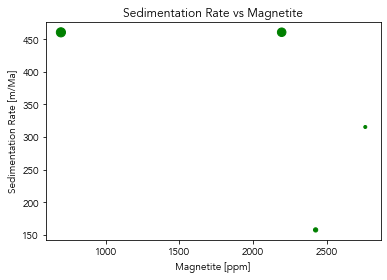

In [16]:
# plot the sed rate comp plot separately, since it has a different presentation
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Ma]", title = "Sedimentation Rate vs Magnetite")
sed_fig.savefig("outputs/ishikawa2002/1118/sed-comp-lin.pdf")

In [17]:
# write data to compilations
data_fns.write_output(comb_df, "ODP 180-1118", "data/comp_raw.xlsx")
data_fns.write_output(interpolated, "ODP 180-1118", "data/comp_inter.xlsx")